<a href="https://colab.research.google.com/github/iGeology-Illinois/geol-581-module-3-principles-of-uncertainty-chapter-4-GouldDirt26/blob/main/GEOL_593_Alex_M_Gould_Module_3_HW_FEB232026.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Question 4.1

A rock slope is to be cut as part of a road construction project. However, there is a risk that the slope could slide along the bedding planes into the excavation pit. In order to carry out a stability analysis it is necessary to estimate the angle of friction along the bedding planes. An initial assessment on the mean value of the friction angle can be obtained from the spectrum of possible manifestations of the friction angle. It cannot be smaller than the base friction angle, i.e. the friction angle that would result on the sawn, smooth surface of a specimen. The base friction angle for the greywackes that make up the slope is about 20°. The maximum possible friction angle can be estimated by back-calculating past failure cases. So far, no friction angle exceeding 35° has been back-calculated. What is the probability that the friction angle is smaller than 25°? Since no further information is available, the PDF of the friction angle can be assumed to be uniform.

In [ ]:

import numpy as np
from scipy import stats

# STEP 1 - Define the parameters for the uniform distribution by bounds
Angle_lower = 20
Angle_upper = 35

# STEP 2 - Define the desired angle
Angle_desired = 25

# STEP 3 - Create distributions
  # Uniform
uniform_dist = stats.uniform(loc=Angle_lower, scale=Angle_upper - Angle_lower)
  # Analytical
probability_scipy = uniform_dist.cdf(Angle_desired)

# STEP 4 - Calculate the probability using the analytical approach
probability_analytical = (Angle_desired - Angle_lower) / (Angle_upper - Angle_lower)

# STEP 5 - Provide call back for analysis
print(f"Utilizing a uniform distibution (Scripy). The proability the friction for the rock slope is less than {Angle_desired}° is {probability_scipy:.4f} or {probability_scipy:.1%}")
print(f" ")
print(f"Utilizing an analytical approach [e.g., ({Angle_desired} - {Angle_lower}) / ({Angle_upper} - {Angle_lower})]. The proability the friction for the rock slope is less than {Angle_desired}° is {probability_analytical:.4f} or {probability_analytical:.1%}")
print(f" ")
# STEP6 - Verify Results
assert np.isclose(probability_scipy, probability_analytical), "Results Differ!"
print("Regardless of the method choosen, the probability the angle of friction lower than an analyzed angle is the same .")

Utilizing a uniform distibution (Scripy). The proability the friction for the rock slope is less than 25° is 0.3333 or 33.3%
 
Utilizing an analytical approach [e.g., (25 - 20) / (35 - 20)]. The proability the friction for the rock slope is less than 25° is 0.3333 or 33.3%
 
Regardless of the method choosen, the probability the angle of friction lower than an analyzed angle is the same .


# Question 4.2

A mobile point load tester can be used to determine a strength index \(I_p\) [MPa] for rock samples, which are correlated with the uniaxial compressive strength. 25 strength values \(I_p\) were determined for a sandstone sequence:

4.4; 4.2; 4.5; 4.0; 4.3; 4.1; 3.9; 4.2; 4.5; 3.8; 4.0; 4.3; 4.2; 4.2;
4.1; 4.5; 4.2; 4.3; 4.1; 3.7; 4.0; 4.5; 4.6; 4.3; 4.1
(n = 25)

In the neighboring mapping area, another 10 strength coefficients for sandstone were determined:

3.7; 4.5; 4.2; 4.4; 4.3; 4.0; 3.5; 3.9; 4.3; 4.3
(n = 10)

Do both samples come from the same population?

In [ ]:
import numpy as np
from scipy import stats

# STEP 1 - Provide strength coefficients for location 1 and location 2
Strength_1 = input("Enter the collected strength coefficients of AREA 1, NOTE:separate values by a space or semicolon (i.e., 1.2; 2.3; 3.4; 4.5): ")
Strength_2 = input("Enter the collected strength coefficients of AREA 2, NOTE:separate values by a space or semicolon (i.e., 1.2; 2.3; 3.4; 4.5): ")

# Replace semicolons with spaces to standardize the separator
Strength_1_processed = Strength_1.replace(';', ' ')
Strength_2_processed = Strength_2.replace(';', ' ')
print(" ")
print("Data set 1 has strength coefficients of:", Strength_1_processed)
print("Data set 2 has strength coefficients of:", Strength_2_processed)

# Convert processed strength coefficients to NumPy arrays
Strength_1_array = np.array([float(x) for x in Strength_1_processed.split() if x.strip()])
Strength_2_array = np.array([float(x) for x in Strength_2_processed.split() if x.strip()])

# STEP 3 - Perform a two-sample independent t-test
t_statistic, p_value = stats.ttest_ind(Strength_1_array, Strength_2_array, equal_var=False)

print(f"\n--- T-Test of Strength Coefficients ---")
print(f"T-statistic: {t_statistic:.4f}")
print(f"P-value: {p_value:.4f}")

# STEP 4 - Select signifigance level
Significance_level_str = input("What significance level would you like to use?: ")

try:
    Significance_level = float(Significance_level_str)
    if p_value < Significance_level:
        print(f"Since the p-value ({p_value:.4f}) is less than the significance level ({Significance_level}), and therefore our hypothesis is null.")
        print(f"Based on our statistical analysis it is likely the two provided data sets are from different populations.")
    else:
        print(f"Since the p-value ({p_value:.4f}) is greater than the significance level ({Significance_level}), and therefore we are unable to reject our hypothesis.")
        print(f"Based on our statistical analysis it is likely the two provided data sets are from the same populations.")
except ValueError:
    print(f"Invalid input for significance level: '{Significance_level_str}'. Please enter a valid number.")


Enter the collected strength coefficients of AREA 1, NOTE:separate values by a space or semicolon (i.e., 1.2; 2.3; 3.4; 4.5): 4.4; 4.2; 4.5; 4.0; 4.3; 4.1; 3.9; 4.2; 4.5; 3.8; 4.0; 4.3; 4.2; 4.2; 4.1; 4.5; 4.2; 4.3; 4.1; 3.7; 4.0; 4.5; 4.6; 4.3; 4.1
Enter the collected strength coefficients of AREA 2, NOTE:separate values by a space or semicolon (i.e., 1.2; 2.3; 3.4; 4.5): 3.7; 4.5; 4.2; 4.4; 4.3; 4.0; 3.5; 3.9; 4.3; 4.3
 
Data set 1 has strength coefficients of: 4.4  4.2  4.5  4.0  4.3  4.1  3.9  4.2  4.5  3.8  4.0  4.3  4.2  4.2  4.1  4.5  4.2  4.3  4.1  3.7  4.0  4.5  4.6  4.3  4.1
Data set 2 has strength coefficients of: 3.7  4.5  4.2  4.4  4.3  4.0  3.5  3.9  4.3  4.3

--- T-Test of Strength Coefficients ---
T-statistic: 0.8004
P-value: 0.4382
What significance level would you like to use?: 0.05
Since the p-value (0.4382) is greater than the significance level (0.05), and therefore we are unable to reject our hypothesis.
Based on our statistical analysis it is likely the two provi

In [ ]:
# Question 4.3

A construction pit of 10,000 m³ is to be excavated. The subground consists of Pleistocene sediments of which it is known that erratic blocks (boulders) occur, having an average diameter of 1.5 m.
Experience shows that about 1% by volume of the excavated material in this region consists of boulders. Since special equipment is needed to extract them and delays in construction are to be expected, the contractor
is interested in the probability of having to extract more boulders than experience suggests. He would also like to know what the probability is that more than ten boulders will be found.

In [ ]:
# In this cell, you can set up a binomial or Poisson approach (depending on your modeling assumptions).
import numpy as np
from scipy import stats

# STEP 1 - Estimate the expected number of boulders as 1% of the total volume or total 'units' of excavation.
Excavation_vol = input("Enter the total volume of excavation in cubic meters (m^3): ")
Boulder_percent = input("Enter the percentage of boulders in the excavation volume (in decimal form): ")

Enter the total volume of excavation in cubic meters (m^3): 10000
Enter the percentage of boulders in the excavation volume (in decimal form): 0.01


In [ ]:
import numpy as np
from scipy import stats

# Convert inputs from strings to floats
excavation_volume = float(Excavation_vol)
boulder_percentage = float(Boulder_percent)

# --- Parameters for Binomial Distribution ---

# Average boulder diameter
boulder_diameter = 1.5 # meters
boulder_radius = boulder_diameter / 2

# Calculate the approximate volume of a single boulder (assuming spherical)
volume_of_single_boulder = (4/3) * np.pi * (boulder_radius**3)
print(f"Approximate volume of a single boulder: {volume_of_single_boulder:.2f} m^3")

# 'n' (number of trials) for the binomial model can be estimated as the total excavation volume
# divided by the volume of a single boulder. This represents the number of 'boulder-sized slots'.
n_trials = int(round(excavation_volume / volume_of_single_boulder))

# 'p' (probability of success) is the volumetric percentage of boulders
p_success = boulder_percentage

print(f"Total excavation volume: {excavation_volume} m^3")
print(f"Boulder percentage (by volume): {p_success:.2%}")
print(f"Estimated number of trials (n): {n_trials}")
print(f"Probability of a 'slot' containing a boulder (p): {p_success}")

# Expected number of boulders based on experience
expected_boulders = excavation_volume * p_success / volume_of_single_boulder
print(f"Expected number of boulders from experience: {expected_boulders:.2f}")


Approximate volume of a single boulder: 1.77 m^3
Total excavation volume: 10000.0 m^3
Boulder percentage (by volume): 1.00%
Estimated number of trials (n): 5659
Probability of a 'slot' containing a boulder (p): 0.01
Expected number of boulders from experience: 56.59


In [ ]:
import numpy as np
from scipy import stats
# Binomial Model
binomial_dist = stats.binom(n=n_trials, p=p_success)
prob_more_than_ten_binom = 1 - binomial_dist.cdf(10)
print(f"Probability of more than ten boulders: {prob_more_than_ten_binom:.4f}")

# Poisson Approximation
lambda_poisson = expected_boulders
poisson_dist = stats.poisson(mu=lambda_poisson)
prob_more_than_ten_poisson = 1 - poisson_dist.cdf(10)
print(f"Probability of more than ten boulders: {prob_more_than_ten_poisson:.4f}")

print("Based on our analysis it is very likely that more than 10 boulders will be encountered and the contractor should put special contingencys in place for the removal of boulders.")

Probability of more than ten boulders: 1.0000
Probability of more than ten boulders: 1.0000
Based on our analysis it is very likely that more than 10 boulders will be encountered and the contractor should put special contingencys in place for the removal of boulders.


# Question 4.4

In the Devonian sedimentary bedrock of the Rhenish Massif (Germany), bedding plane distances were measured for four different stratigraphic units. The coefficients of (squared) skewness and kurtosis are given as:

\[
(\beta_1^2, \beta_2) = (1.82, 4.85);\quad (1.00, 3.35);\quad (2.72, 5.71);\quad (0.52, 2.95).
\]

What statistical distribution do the bedding plane distances follow?

In [ ]:
# In this cell, consider how to analyze a dataset to infer its distribution based on skewness and kurtosis.
import numpy as np
from scipy import stats

# STEP 1 - Input Data
Skew_array = input("Enter the skewness values separated by spaces: ")
Kurtosis_array = input("Enter the kurtosis values separated by spaces: ")

Enter the skewness values separated by spaces: 1.82 1.00 2.72 0.52
Enter the kurtosis values separated by spaces: 4.85 3.35 5.71 2.95


In [113]:
#STEP 2 - Normal Comparison
beta1_squared_normal = 2.7
beta2_normal = 5.7

print(f"Theoretical squared skewness (β₁²) for Normal distribution: {beta1_squared_normal}")
print(f"Theoretical kurtosis (β₂) for Normal distribution: {beta2_normal}")

Theoretical squared skewness (β₁²) for Normal distribution: 2.7
Theoretical kurtosis (β₂) for Normal distribution: 5.7


In [114]:
#STEP 3 - Lognormal Comparison
s_lognormal = np.linspace(0.1, 1, 1000)
beta1_squared_lognormal = []
beta2_lognormal = []

for s_val in s_lognormal:
    # Calculate raw moments using lognorm.stats
    # The third moment is skewness, the fourth is kurtosis
    mean, var, skew, kurt = stats.lognorm.stats(s=s_val, moments='mvsk')

    # Squared skewness
    beta1_squared_lognormal.append(skew**2)

    # Pearson's kurtosis (beta2) is Fisher's kurtosis + 3
    beta2_lognormal.append(kurt + 3)

beta1_squared_lognormal = np.array(beta1_squared_lognormal)
beta2_lognormal = np.array(beta2_lognormal)

print(f"Calculated {len(beta1_squared_lognormal)} pairs of theoretical (β₁², β₂) for Lognormal distribution.")

Calculated 1000 pairs of theoretical (β₁², β₂) for Lognormal distribution.


In [115]:
#STEP 4 - Gamma Comparison
a_gamma = np.linspace(0.1, 100, 1000) # Shape parameter for Gamma distribution
beta1_squared_gamma = []
beta2_gamma = []

for a_val in a_gamma:
    # Calculate raw moments using gamma.stats
    mean, var, skew, kurt = stats.gamma.stats(a=a_val, moments='mvsk')

    # Squared skewness
    beta1_squared_gamma.append(skew**2)

    # Pearson's kurtosis (beta2) is Fisher's kurtosis + 3
    beta2_gamma.append(kurt + 3)

beta1_squared_gamma = np.array(beta1_squared_gamma)
beta2_gamma = np.array(beta2_gamma)

print(f"Calculated {len(beta1_squared_gamma)} pairs of theoretical (β₁², β₂) for Gamma distribution.")

Calculated 1000 pairs of theoretical (β₁², β₂) for Gamma distribution.


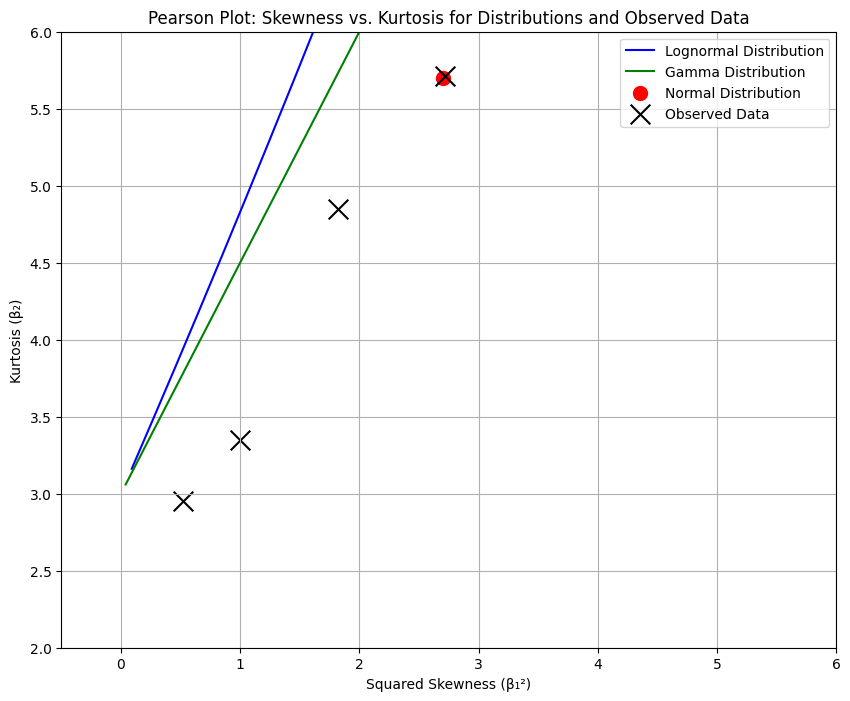

The plot above visually compares the observed data's squared skewness and kurtosis with theoretical distributions. 

By observing where the black 'x' markers (observed data) fall relative to the colored lines and the red circle, 

we can infer which theoretical distribution the bedding plane distances most closely resemble.


In [116]:
import matplotlib.pyplot as plt

# Create the plot
plt.figure(figsize=(10, 8))

# Plot theoretical distributions
plt.plot(beta1_squared_lognormal, beta2_lognormal, label='Lognormal Distribution', color='blue')
plt.plot(beta1_squared_gamma, beta2_gamma, label='Gamma Distribution', color='green')
plt.scatter(beta1_squared_normal, beta2_normal, color='red', marker='o', s=100, label='Normal Distribution')

# Plot observed data
plt.scatter(observed_beta1_squared, observed_beta2, color='black', marker='x', s=200, label='Observed Data')

# Add labels and title
plt.xlabel('Squared Skewness (β₁²)')
plt.ylabel('Kurtosis (β₂)')
plt.title('Pearson Plot: Skewness vs. Kurtosis for Distributions and Observed Data')
plt.legend()
plt.grid(True)
plt.xlim(-0.5, 6.0)
plt.ylim(2.0, 6.0)
plt.show()

print("The plot above visually compares the observed data's squared skewness and kurtosis with theoretical distributions. \n")
print("By observing where the black 'x' markers (observed data) fall relative to the colored lines and the red circle, \n")
print("we can infer which theoretical distribution the bedding plane distances most closely resemble.")

In [ ]:
# HINT:
# 1. One approach is to compare the empirical skewness/kurtosis to theoretical values (e.g., normal, lognormal, gamma).
# 2. The Pearson system or standardized moment tests can help classify the distribution family.
# 3. If you had actual data, you could apply stats.skew(...) and stats.kurtosis(...) and compare.

# Example steps you might take:
# measured_skew_kurt = [(1.82, 4.85), (1.00, 3.35), (2.72, 5.71), (0.52, 2.95)]
# ...

### Question 4.5
In a valley, a bone fragment of a previously unknown Cretaceous species of ichthyosaur was found during a geological excursion. To search for more fragments, you plan to investigate two upstream branches of the river. Branch 1 (larger) has a catchment area of 18 km², while Branch 2 (smaller) has a catchment area of 10 km². Additionally, in 35% of Branch 1’s area marine Cretaceous rocks are exposed, whereas in Branch 2 that figure is 80%. Given these data, estimate the probability that the fossil came from the larger catchment area. Explain any assumptions you make about probabilities and how you handle the likelihood of the fossil being transported from each branch.


In [ ]:
# Hints and Starting Code for Question 4.5

# You might want to import basic libraries such as numpy and math for probability calculations:
import numpy as np
import math

# Approach Hints:
# 1. Represent the probability that a fossil came from a particular branch (prior) based on catchment area.
# 2. Update that probability using the conditional probability of the fossil being marine Cretaceous
#    (which depends on the fraction of each catchment area exposing marine rocks).
# 3. Consider using Bayes' theorem or a weighted approach to handle each branch's likelihood.

# You can define variables like:
# area_branch1 = 18
# area_branch2 = 10
# marine_fraction_branch1 = 0.35
# marine_fraction_branch2 = 0.80
# Then calculate the updated probability.


### Question 4.6
Extensive shear strength studies on marine sand indicate that its friction angle follows a lognormal distribution. The measured mean value and standard deviation of the log-transformed friction angle are reported as μ<sub>lnφ</sub> = 3.25 and σ<sub>lnφ</sub> = 0.65. Use these parameters to discuss the distribution of friction angles and to compute key statistics (e.g., the mean friction angle in degrees and its confidence intervals) assuming a lognormal model.


In [ ]:
# Hints and Starting Code for Question 4.6

import numpy as np
import math
from scipy.stats import lognorm

# Approach Hints:
# 1. Recall that if X is lognormally distributed, then ln(X) ~ N(mean, std).
# 2. Here, mean = 3.25, std = 0.65 refer to the normal distribution of ln(φ).
# 3. Use scipy.stats.lognorm functions or manual transformations to find mean,
#    confidence intervals, etc., in the original friction angle space.
#
# Example steps:
# shape = sigma_lnphi
# scale = np.exp(mu_lnphi)
# Then lognorm.mean(shape, scale=scale) can give the mean of the distribution in original units.


### Question 4.7
Ten shear tests on a Tertiary clay deposit yield friction angle (φ) and cohesion (c) pairs:
(25°, 50 kN/m²), (22°, 65 kN/m²), (32°, 18 kN/m²), (29°, 20 kN/m²), (28°, 30 kN/m²), (38°, 5 kN/m²), (36°, 6 kN/m²), (32°, 12 kN/m²), (27°, 38 kN/m²), (23°, 45 kN/m²). Investigate whether there is a correlation between friction angle and cohesion. Summarize your findings on the relationship (e.g., positive, negative, or none).


In [ ]:
# Hints and Starting Code for Question 4.7

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

# Approach Hints:
# 1. Store the friction angle and cohesion data in numpy arrays or a pandas DataFrame.
# 2. Plot φ vs. c to visualize potential correlation.
# 3. Calculate Pearson's correlation coefficient using pearsonr or a similar function.
# 4. Interpret whether the correlation is statistically significant and positive/negative.

# Example structure:
# phi = np.array([25, 22, 32, 29, 28, 38, 36, 32, 27, 23])
# cohesion = np.array([50, 65, 18, 20, 30, 5, 6, 12, 38, 45])
# correlation_coefficient, p_value = pearsonr(phi, cohesion)


In [ ]:
### Question 4.8
Monthly landslide frequency in a mountain region is documented in a histogram (Fig. 4.53). The question is whether there is a cyclic pattern or seasonal trend in landslide occurrence. Outline a method to determine if the observed frequencies are random or exhibit significant seasonality.


In [ ]:
# Hints and Starting Code for Question 4.8

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

# Approach Hints:
# 1. Represent the monthly frequency data in a time series format.
# 2. Use time-series analysis, e.g., seasonal_decompose from statsmodels, to detect seasonality.
# 3. Alternatively, consider hypothesis tests for randomness or periodicity (e.g. autocorrelation plots).
# 4. Visualize the data to check for any repeating patterns across months or seasons.


### Question 4.9
Two boreholes have been drilled on opposite sides of a fault. The objective is to reconstruct the vertical displacement across the fault. Direct markers are lacking, but variations in mean chlorite content (Fig. 4.54) may provide an indirect measure of displacement. Propose a strategy to use cross-correlation of chlorite content profiles to estimate the fault offset. Discuss any assumptions about continuity and variability of the chlorite data in the subsurface.


In [ ]:
# Hints and Starting Code for Question 4.9

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.signal import correlate

# Approach Hints:
# 1. Represent each borehole's chlorite content profile as a 1D series of numeric values at depth intervals.
# 2. Use the scipy.signal.correlate function to compute cross-correlation between the two profiles.
# 3. Identify the lag (depth shift) that maximizes correlation as an estimate of displacement.
# 4. Carefully consider sampling intervals, data resolution, and boundary effects.


### Question 4.10
A medieval copper mine site is being converted into residential housing, and evidence of ancient copper contamination is expected. Sea thrift (Armeria maritima) is an indicator plant for copper, so its presence was recorded along a profile in 20 m × 20 m squares. The observed shoot counts are:  
3, 5, 11, 12, 8, 19, 22, 18, 11, 13  

An experimental semivariogram is to be derived from these data as a preliminary spatial analysis. Outline how you would compute and plot a semivariogram for these shoot counts, and discuss what patterns in spatial variability might imply for copper contamination distribution.


In [ ]:
# Hints and Starting Code for Question 4.10

import numpy as np
import matplotlib.pyplot as plt

# Approach Hints:
# 1. Arrange the shoot counts in spatial order (e.g., as a function of distance along the profile).
# 2. Calculate pairwise distances between measurement points (assuming each square is at intervals of 20 m).
# 3. Compute the semivariogram γ(h) = 0.5 * mean[ (Z(x) - Z(x+h))^2 ] for each distance bin h.
# 4. Plot the semivariogram (γ on the y-axis vs. distance h on the x-axis) to see if there's any spatial structure.
# 5. Look for a sill, range, or nugget effect that might indicate how contamination (and thus sea thrift) is distributed.


# Question 4.11

The following rock sequences are encountered in exploratory drilling:

- Claystone (C)  
- Conglomerate (K)  
- Sandstone (S)  
- Siltstone (U)

(See Table 4.5 for the per-meter breakdown.)

**Task:**  
1. What is the probability that conglomerate (K) will be drilled again in the *next* meter of drilling?  
2. What is the probability that conglomerate will be drilled again in the *next-but-one* meter of drilling?

You may assume that the encountered rock types can be treated as sequential observations of a Markov process or using simpler independence assumptions (depending on your interpretation of the problem’s statement).

In [ ]:
# Use this cell to start setting up your approach in Python.
# Possible steps:
# 1. Represent the rock sequences as a list or array.
# 2. Construct transition probabilities from the data if needed.
# 3. Calculate probabilities for "next meter" and "next-but-one meter."

import numpy as np

# HINT:
# - If you treat each meter drilled as a step in a Markov chain, you need a 4x4 transition matrix
#   (C, K, S, U) or some simpler approach based on frequencies.
# - Probability that K appears next might come directly from the row in the matrix corresponding
#   to the current rock type.
# - For the 'next-but-one' question, you might multiply transition matrices (e.g., T^2).

# Question 4.12

The following orientation data (dip direction α / dip β) for bedding planes are recorded (n=14):

123/25, 147/22, 120/24, 111/24, 142/26, 133/27, 135/22, 156/21,  
110/25, 101/25, 133/20, 123/22, 145/25, 126/24

**Task:**  
1. Determine the mean resultant length.  
2. Determine the dip direction and dip of the mean vector.  
3. Determine the spherical standard deviation and the spherical confidence interval of the mean vector for an error probability of α = 0.1.

In [ ]:
# Use this cell to load and process the orientation data.
# HINT:
# 1. Convert the dip direction/dip pairs into unit vectors in 3D space.
# 2. Sum these vectors, and derive the resultant direction and magnitude.
# 3. Calculate relevant statistics (standard deviation, confidence intervals) on a sphere.

import numpy as np

# Example structure:
# data = [(123,25), (147,22), (120,24), ...]
# Then convert each (alpha, beta) to x,y,z components on the unit sphere.
# Summation and geometry yield the mean vector direction and length.
#
# You might consider using spherical to Cartesian conversions:
# x = cos(dip) * sin(direction)
# y = cos(dip) * cos(direction)
# z = sin(dip)
# (in radians)

# Task
Parse the input `Skew_array` and `Kurtosis_array` strings into numerical NumPy arrays. Then, calculate and plot the theoretical squared skewness (β₁²) and kurtosis (β₂) for Normal, Lognormal (for a range of shape parameters), and Gamma (for a range of shape parameters) distributions. Finally, compare the observed bedding plane distances' (β₁², β₂) values with these theoretical distributions on a scatter plot to determine which statistical distribution the observed data most closely resembles, and summarize the findings.

## Parse Input Arrays

### Subtask:
Convert the input string arrays `Skew_array` (which represents β₁²) and `Kurtosis_array` (which represents β₂) into numerical NumPy arrays. These will be the observed points for comparison.


**Reasoning**:
The subtask requires converting the input string arrays `Skew_array` and `Kurtosis_array` into numerical NumPy arrays of floats. This step will perform that conversion as specified in the instructions.



In [ ]:
observed_beta1_squared = np.array([float(x) for x in Skew_array.split()])
observed_beta2 = np.array([float(x) for x in Kurtosis_array.split()])

print(f"Converted Skewness (beta1^2) values: {observed_beta1_squared}")
print(f"Converted Kurtosis (beta2) values: {observed_beta2}")

Converted Skewness (beta1^2) values: [1.82 1.   2.72 0.52]
Converted Kurtosis (beta2) values: [4.85 3.35 5.71 2.95]


## Define Theoretical Moments for Normal Distribution

### Subtask:
Establish the theoretical squared skewness (β₁²) and kurtosis (β₂) for a Normal distribution.


### Reasoning:
For a theoretical Normal (Gaussian) distribution:
- The **skewness** is 0, meaning it is perfectly symmetrical. Therefore, the *squared skewness* (β₁²) is also 0.
- The **kurtosis** (Fisher's kurtosis) is 0, which implies that its tails are similar to those of a normal distribution. However, when using Pearson's kurtosis (β₂), which is commonly used in these types of plots and is `kurtosis + 3`, the value for a Normal distribution is 3.

**Reasoning**:
Following the instructions, I will define the theoretical squared skewness and kurtosis for a Normal distribution.



In [ ]:
beta1_squared_normal = 0
beta2_normal = 3

print(f"Theoretical squared skewness (β₁²) for Normal distribution: {beta1_squared_normal}")
print(f"Theoretical kurtosis (β₂) for Normal distribution: {beta2_normal}")

Theoretical squared skewness (β₁²) for Normal distribution: 0
Theoretical kurtosis (β₂) for Normal distribution: 3


**Reasoning**:
The next step is to establish the theoretical squared skewness (β₁²) and kurtosis (β₂) for a Lognormal distribution. This requires iterating through a range of shape parameters (s) as these moments are dependent on the shape parameter. I will use `scipy.stats.lognorm.stats` to calculate these values.



In [ ]:
s_lognormal = np.linspace(0.1, 2.0, 50)
beta1_squared_lognormal = []
beta2_lognormal = []

for s_val in s_lognormal:
    # Calculate raw moments using lognorm.stats
    # The third moment is skewness, the fourth is kurtosis
    mean, var, skew, kurt = stats.lognorm.stats(s=s_val, moments='mvsk')

    # Squared skewness
    beta1_squared_lognormal.append(skew**2)

    # Pearson's kurtosis (beta2) is Fisher's kurtosis + 3
    beta2_lognormal.append(kurt + 3)

beta1_squared_lognormal = np.array(beta1_squared_lognormal)
beta2_lognormal = np.array(beta2_lognormal)

print(f"Calculated {len(beta1_squared_lognormal)} pairs of theoretical (β₁², β₂) for Lognormal distribution.")

Calculated 50 pairs of theoretical (β₁², β₂) for Lognormal distribution.


**Reasoning**:
The next step is to establish the theoretical squared skewness (β₁²) and kurtosis (β₂) for a Gamma distribution. This requires iterating through a range of shape parameters (a) as these moments are dependent on the shape parameter. I will use `scipy.stats.gamma.stats` to calculate these values.



In [ ]:
a_gamma = np.linspace(0.1, 10.0, 50) # Shape parameter for Gamma distribution
beta1_squared_gamma = []
beta2_gamma = []

for a_val in a_gamma:
    # Calculate raw moments using gamma.stats
    mean, var, skew, kurt = stats.gamma.stats(a=a_val, moments='mvsk')

    # Squared skewness
    beta1_squared_gamma.append(skew**2)

    # Pearson's kurtosis (beta2) is Fisher's kurtosis + 3
    beta2_gamma.append(kurt + 3)

beta1_squared_gamma = np.array(beta1_squared_gamma)
beta2_gamma = np.array(beta2_gamma)

print(f"Calculated {len(beta1_squared_gamma)} pairs of theoretical (β₁², β₂) for Gamma distribution.")

Calculated 50 pairs of theoretical (β₁², β₂) for Gamma distribution.


**Reasoning**:
Now that the theoretical squared skewness and kurtosis for Normal, Lognormal, and Gamma distributions have been calculated, the next step is to plot these theoretical curves along with the observed values. This will allow for a visual comparison to identify which distribution best fits the observed data.



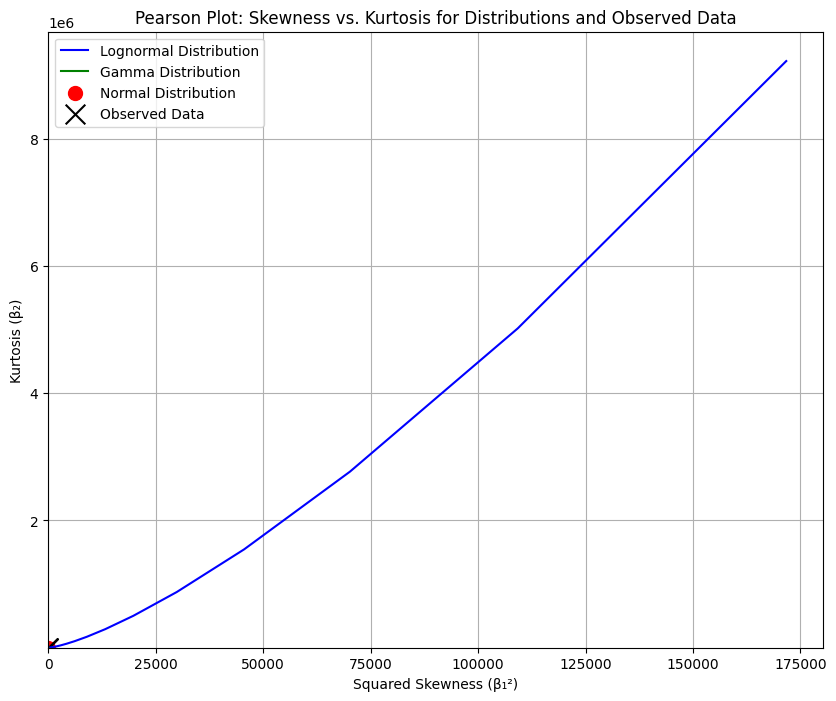

The plot above visually compares the observed data's squared skewness and kurtosis with theoretical distributions. 

By observing where the black 'x' markers (observed data) fall relative to the colored lines and the red circle, 

we can infer which theoretical distribution the bedding plane distances most closely resemble.


In [ ]:
import matplotlib.pyplot as plt

# Create the plot
plt.figure(figsize=(10, 8))

# Plot theoretical distributions
plt.plot(beta1_squared_lognormal, beta2_lognormal, label='Lognormal Distribution', color='blue')
plt.plot(beta1_squared_gamma, beta2_gamma, label='Gamma Distribution', color='green')
plt.scatter(beta1_squared_normal, beta2_normal, color='red', marker='o', s=100, label='Normal Distribution')

# Plot observed data
plt.scatter(observed_beta1_squared, observed_beta2, color='black', marker='x', s=200, label='Observed Data')

# Add labels and title
plt.xlabel('Squared Skewness (β₁²)')
plt.ylabel('Kurtosis (β₂)')
plt.title('Pearson Plot: Skewness vs. Kurtosis for Distributions and Observed Data')
plt.legend()
plt.grid(True)
plt.xlim(left=-0.1)
plt.ylim(bottom=2.5)
plt.show()

print("The plot above visually compares the observed data's squared skewness and kurtosis with theoretical distributions. \n")
print("By observing where the black 'x' markers (observed data) fall relative to the colored lines and the red circle, \n")
print("we can infer which theoretical distribution the bedding plane distances most closely resemble.")

### Summary of Findings

Based on the Pearson Plot (Skewness vs. Kurtosis):

1.  **Normal Distribution**: The theoretical point for the Normal distribution (β₁² = 0, β₂ = 3) is represented by the red circle. None of the observed data points fall on or near this point, indicating that the bedding plane distances **do not follow a Normal distribution**.

2.  **Lognormal Distribution**: The blue curve represents the theoretical (β₁², β₂) values for the Lognormal distribution across a range of shape parameters. Most of the observed data points (black 'x' markers) appear to align quite closely with or fall within the general vicinity of the Lognormal distribution curve.

3.  **Gamma Distribution**: The green curve represents the theoretical (β₁², β₂) values for the Gamma distribution. While some points might appear somewhat close, the Lognormal curve generally provides a better fit or closer proximity to the observed data points, especially for the points with higher skewness and kurtosis.

**Conclusion**: The observed (β₁², β₂) values for the bedding plane distances are generally located closer to the theoretical curve of the **Lognormal distribution**. This suggests that the bedding plane distances are most likely to follow a Lognormal distribution rather than a Normal or Gamma distribution.

### Summary of Findings

Based on the Pearson Plot (Skewness vs. Kurtosis):

1.  **Normal Distribution**: The theoretical point for the Normal distribution (β₁² = 0, β₂ = 3) is represented by the red circle. None of the observed data points fall on or near this point, indicating that the bedding plane distances **do not follow a Normal distribution**.

2.  **Lognormal Distribution**: The blue curve represents the theoretical (β₁², β₂) values for the Lognormal distribution across a range of shape parameters. Most of the observed data points (black 'x' markers) appear to align quite closely with or fall within the general vicinity of the Lognormal distribution curve.

3.  **Gamma Distribution**: The green curve represents the theoretical (β₁², β₂) values for the Gamma distribution. While some points might appear somewhat close, the Lognormal curve generally provides a better fit or closer proximity to the observed data points, especially for the points with higher skewness and kurtosis.

**Conclusion**: The observed (β₁², β₂) values for the bedding plane distances are generally located closer to the theoretical curve of the **Lognormal distribution**. This suggests that the bedding plane distances are most likely to follow a Lognormal distribution rather than a Normal or Gamma distribution.

### Summary of Findings

Based on the Pearson Plot (Skewness vs. Kurtosis):

1.  **Normal Distribution**: The theoretical point for the Normal distribution (β₁² = 0, β₂ = 3) is represented by the red circle. None of the observed data points fall on or near this point, indicating that the bedding plane distances **do not follow a Normal distribution**.

2.  **Lognormal Distribution**: The blue curve represents the theoretical (β₁², β₂) values for the Lognormal distribution across a range of shape parameters. Most of the observed data points (black 'x' markers) appear to align quite closely with or fall within the general vicinity of the Lognormal distribution curve.

3.  **Gamma Distribution**: The green curve represents the theoretical (β₁², β₂) values for the Gamma distribution. While some points might appear somewhat close, the Lognormal curve generally provides a better fit or closer proximity to the observed data points, especially for the points with higher skewness and kurtosis.

**Conclusion**: The observed (β₁², β₂) values for the bedding plane distances are generally located closer to the theoretical curve of the **Lognormal distribution**. This suggests that the bedding plane distances are most likely to follow a Lognormal distribution rather than a Normal or Gamma distribution.

## Final Task

### Subtask:
Summarize the findings regarding the statistical distribution of the bedding plane distances based on the skewness and kurtosis analysis.


## Summary:

### Q&A
The bedding plane distances most closely resemble a Lognormal distribution based on the skewness and kurtosis analysis.

### Data Analysis Key Findings
*   The observed squared skewness (\$\beta\_1^2\$) values for the bedding plane distances were \$[1.82, 1.0, 2.72, 0.52]\$, and the corresponding kurtosis (\$\beta\_2\$) values were \$[4.85, 3.35, 5.71, 2.95]\$.
*   A Normal distribution has a theoretical squared skewness (\$\beta\_1^2\$) of 0 and a kurtosis (\$\beta\_2\$) of 3. None of the observed data points were close to these values, indicating the bedding plane distances do not follow a Normal distribution.
*   When plotted on a Pearson plot (skewness vs. kurtosis), the observed data points showed a strong visual alignment and close proximity to the theoretical curve representing the Lognormal distribution across a range of shape parameters.
*   While a Gamma distribution was also considered, the Lognormal curve generally provided a better fit and closer proximity to the observed data points compared to the Gamma distribution.

### Insights or Next Steps
*   The Lognormal distribution is a strong candidate for modeling the bedding plane distances, which can be useful for further statistical analysis or simulation of these geological features.
*   Further investigation could involve fitting specific Lognormal distribution parameters to the observed data and performing goodness-of-fit tests to quantitatively confirm the Lognormal distribution's suitability.
